<!DOCTYPE html>

<html>
  <head>
  </head>

  <body>
    <h1> Study of ethnic residential segregation and health outcomes with clustering analysis in Bradford, UK </h1>
    <p>The Purpose of this file is to understand the pattern of  health segregation in Bradford with respect to each ethnic groupsa</p> 
  </body>
</html>

> **UK Health data**

Health data contains 3 factors such as general health which defines the health of each neighborhood in Bradford. Second factor is disability containing attributes on how disability is spread across Bradford. The third factor explains about the provision of unpaid care provided in Bradford.

`General health`
In 2021, 42.4% of Bradford residents are categorised under population of "very good", which has been increased around from 40.0% when compared to 2011. A proportional of 36.6% describing their health as "good" has dropped to 35.7%. Similarly, population of 1.6% described their health as "very bad" while those describing their health as "bad" fell from 5.5% to 5.2%.

`Unpaid care`
There are many unpaid care services provided to the people residing in Bradford. This service might tend to change in time depending on various residing areas within the city. Around 20 and 49 hours of weekly unpaid care is provided, and this percentage has increased from 1.4% to 2.2% in 2021. However, there are some places where there is no unpaid care is provided to the people.

`Disability`
Disability is one of the major effects of segregation. Study suggests that people with disability often tend to be in a segregated region irrespective of ethnic groups <refer>. From the census data, there was proportion of people who were identified as disabled. There were several categories under which they were recorded as disabled. A proportion of 9.4% and 10% were identified as disabled a lot and disabled a limited. 

    
> Link to download data : __[Bradford health data](https://www.ons.gov.uk/datasets/RM043/editions/2021/versions/1)__

In [1]:
# Importing required dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px # visualization

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading UK 2021 census dataset

df_census_2021 = pd.read_csv("Dataset/Ethnic_census_data/2021_data/data_census_2021.csv", index_col=0)
df_census_2021.head(2)

LSOA             LAD Output_Areas  Asian  Black  White  Others
0  E01000001  City of London    E00000001      5      3    155      13
1  E01000001  City of London    E00000003     24      5    209      17

In [3]:
#Removing the column geography form LDA dataset before joining LDA and LSOA dataset

df_census_2021.drop(df_census_2021.loc[:,['Output_Areas']], inplace=True, axis=1)

In [4]:
# Selecting only Bradford for further analysis

df_census_2021 = df_census_2021[(df_census_2021.LAD == "Bradford")]

In [5]:
# counting unique values in join_data

n = len(pd.unique(df_census_2021["LSOA"]))
print("No.of.unique values :",n)

No.of.unique values : 312


In [6]:
# Checking the shape of the file

df_census_2021.shape

(1575, 6)

In [7]:
# Loading the health dataset

census2021_ts037_lsoa = pd.read_csv("Dataset/Health/census2021-ts037-lsoa.csv", index_col=0)

census2021_ts038_lsoa = pd.read_csv("Dataset/Health/census2021-ts038-lsoa.csv", index_col=0)

census2021_ts039_lsoa = pd.read_csv("Dataset/Health/census2021-ts039-lsoa.csv", index_col=0)

census2021_ts040_lsoa = pd.read_csv("Dataset/Health/census2021-ts040-lsoa.csv", index_col=0)

In [8]:
#Removing the column geography form LDA dataset before joining LDA and LSOA dataset

census2021_ts037_lsoa.drop(census2021_ts037_lsoa.loc[:,['geography']], inplace=True, axis=1)

census2021_ts038_lsoa.drop(census2021_ts038_lsoa.loc[:,['geography']], inplace=True, axis=1)

census2021_ts039_lsoa.drop(census2021_ts039_lsoa.loc[:,['geography']], inplace=True, axis=1)

census2021_ts040_lsoa.drop(census2021_ts040_lsoa.loc[:,['geography']], inplace=True, axis=1)

In [9]:
census2021_ts037_lsoa.shape

(35672, 7)

In [10]:
census2021_ts037_lsoa.head(1)

geography code  General health: Total: All usual residents  \
date                                                              
2021      E01000001                                        1475   

      General health: Very good health  General health: Good health  \
date                                                                  
2021                               859                          468   

      General health: Fair health  General health: Bad health  \
date                                                            
2021                          119                          18   

      General health: Very bad health  
date                                   
2021                               11

In [11]:
census2021_ts038_lsoa.shape

(35672, 8)

In [12]:
census2021_ts038_lsoa.head(1)

geography code  Disability: Total: All usual residents  \
date                                                          
2021      E01000001                                    1475   

      Disability: Disabled under the Equality Act  \
date                                                
2021                                          152   

      Disability: Disabled under the Equality Act: Day-to-day activities limited a lot  \
date                                                                                     
2021                                                 36                                  

      Disability: Disabled under the Equality Act: Day-to-day activities limited a little  \
date                                                                                        
2021                                                116                                     

      Disability: Not disabled under the Equality Act  \
date                                                    
2021                                             1323   

      Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited  \
date                                                                                                                                                 
2021                                                140                                                                                              

      Disability: Not disabled under the Equality Act: No long term physical or mental health conditions  
date                                                                                                      
2021                                               1183

In [13]:
census2021_ts039_lsoa.shape

(35672, 10)

In [14]:
census2021_ts039_lsoa.head(1)

geography code  \
date                  
2021      E01000001   

      Provision of unpaid care: Total: All usual residents aged 5 and over  \
date                                                                         
2021                                               1422                      

      Provision of unpaid care: Provides no unpaid care  \
date                                                      
2021                                               1322   

      Provision of unpaid care: Provides 19 hours or less unpaid care a week  \
date                                                                           
2021                                                 67                        

      Provision of unpaid care: Provides 9 hours or less unpaid care a week  \
date                                                                          
2021                                                 52                       

      Provision of unpaid care: Provides 10 to 19 hours unpaid care a week  \
date                                                                         
2021                                                 15                      

      Provision of unpaid care: Provides 20 to 49 hours unpaid care a week  \
date                                                                         
2021                                                 18                      

      Provision of unpaid care: Provides 20 to 34 hours unpaid care a week  \
date                                                                         
2021                                                  9                      

      Provision of unpaid care: Provides 35 to 49 hours unpaid care a week  \
date                                                                         
2021                                                  9                      

      Provision of unpaid care: Provides 50 or more hours unpaid care a week  
date                                                                          
2021                                                 15

In [15]:
census2021_ts040_lsoa.shape

(35672, 5)

In [16]:
census2021_ts040_lsoa.head(1)

geography code  \
date                  
2021      E01000001   

      Number of disabled people in household: Total: All households  \
date                                                                  
2021                                                838               

      Number of disabled people in household: No people disabled under the Equality Act in household  \
date                                                                                                   
2021                                                701                                                

      Number of disabled people in household: 1 person disabled under the Equality Act in household  \
date                                                                                                  
2021                                                123                                               

      Number of disabled people in household: 2 or more people disabled under the Equality Act in household  
date                                                                                                         
2021                                                 14

## 2. Data Preparation

In [17]:
#Joining 2021 health data

join_data = pd.merge(left = census2021_ts037_lsoa, right = census2021_ts038_lsoa, how = 'left', on = 'geography code' )

In [18]:
#Joining 2021 health data

join_data = pd.merge(left = join_data, right = census2021_ts039_lsoa, how = 'left', on = 'geography code' )

In [19]:
#Joining 2021 health data

join_data = pd.merge(left = join_data, right = census2021_ts040_lsoa, how = 'left', on = 'geography code' )

In [20]:
# Renaming the column in 2021 census data for further joining of data

df_census_2021 = df_census_2021.rename(columns={'LSOA': 'geography code'})

In [21]:
# Use GroupBy() to compute the sum
df2 = df_census_2021.groupby('geography code').sum()

In [22]:
#Joining health data with census data

health_census = pd.merge(left = df2, right = join_data, how = 'left', on = 'geography code' )

In [23]:
health_census.shape

(312, 31)

### 2.1 Feature Engineering

In [24]:
#Dataset Information for health_census data

print('The Employment Rate dataframe has {} rows and {} columns'.format(health_census.shape[0], health_census.shape[1]))

The Employment Rate dataframe has 312 rows and 31 columns


In [25]:
# Renaming the column in 2021 census data for further joining of data

health_census = health_census.rename(columns={'geography code' : 'LSOA'})

In [26]:
# Number of LAD in UK census dataset

health_census['LSOA'].unique().size

312

In [27]:
#Description of Datasets

health_census.describe(include='all')

LSOA        Asian       Black        White      Others  \
count         312   312.000000  312.000000   312.000000  312.000000   
unique        312          NaN         NaN          NaN         NaN   
top     E01010568          NaN         NaN          NaN         NaN   
freq            1          NaN         NaN          NaN         NaN   
mean          NaN   562.983974   35.272436  1070.464744   82.612179   
std           NaN   615.979284   43.981502   540.291566   52.050497   
min           NaN     3.000000    0.000000    45.000000    7.000000   
25%           NaN    56.000000    8.000000   546.250000   42.000000   
50%           NaN   273.500000   19.000000  1202.000000   73.000000   
75%           NaN  1054.250000   43.000000  1491.000000  113.250000   
max           NaN  2286.000000  408.000000  2361.000000  290.000000   

        General health: Total: All usual residents  \
count                                   312.000000   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                   1751.272436   
std                                     317.107921   
min                                    1056.000000   
25%                                    1543.000000   
50%                                    1677.500000   
75%                                    1941.750000   
max                                    2852.000000   

        General health: Very good health  General health: Good health  \
count                         312.000000                   312.000000   
unique                               NaN                          NaN   
top                                  NaN                          NaN   
freq                                 NaN                          NaN   
mean                          808.131410                   604.685897   
std                           171.413432                   113.371586   
min                           409.000000                   337.000000   
25%                           691.500000                   525.500000   
50%                           792.000000                   587.500000   
75%                           910.750000                   668.500000   
max                          1459.000000                  1035.000000   

        General health: Fair health  General health: Bad health  ...  \
count                     312.00000                  312.000000  ...   
unique                          NaN                         NaN  ...   
top                             NaN                         NaN  ...   
freq                            NaN                         NaN  ...   
mean                      234.38141                   79.794872  ...   
std                        49.62877                   29.266976  ...   
min                       101.00000                   19.000000  ...   
25%                       203.75000                   58.750000  ...   
50%                       234.00000                   78.000000  ...   
75%                       269.25000                  103.000000  ...   
max                       383.00000                  178.000000  ...   

        Provision of unpaid care: Provides 9 hours or less unpaid care a week  \
count                                          312.000000                       
unique                                                NaN                       
top                                                   NaN                       
freq                                                  NaN                       
mean                                            44.064103                       
std                                             18.212811                       
min                                              9.000000                       
25%                                             30.000000                       
50%                                     

#### 2.1.1 Renaming feature names

In [28]:
health_census.rename(columns={'General health: Total: All usual residents': 'General_Health_Total', 
                              'General health: Very good health' : 'Health_Very_Good', 
                              'General health: Good health' : 'Health_Good',
                              'General health: Fair health' : 'Health_Fair', 
                              'General health: Bad health' : 'Health_Bad',
                              'General health: Very bad health' : 'Health_Very_Bad',
                              
                              'Disability: Total: All usual residents' : 'Disability_Total',
                              'Disability: Disabled under the Equality Act' : 'Disabled',
                              'Disability: Disabled under the Equality Act: Day-to-day activities limited a lot' : 'Disability_limited_lot',
                              'Disability: Disabled under the Equality Act: Day-to-day activities limited a little' : 'Disability_limited_little',
                              'Disability: Not disabled under the Equality Act' : 'Disability_No',
                              'Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited' : 'Disability_phy_mental_yes',
                              'Disability: Not disabled under the Equality Act: No long term physical or mental health conditions' : 'Disability_phy_mental_no',
                              
                              'Provision of unpaid care: Total: All usual residents aged 5 and over' : 'unpaid_care_total',
                              'Provision of unpaid care: Provides no unpaid care' : 'unpaid_care_no',
                              'Provision of unpaid care: Provides 19 hours or less unpaid care a week' : 'unpaid_care_upto19',
                              'Provision of unpaid care: Provides 9 hours or less unpaid care a week' : 'unpaid_care_upto9',
                              'Provision of unpaid care: Provides 10 to 19 hours unpaid care a week' : 'unpaid_care_10to19',
                              'Provision of unpaid care: Provides 20 to 49 hours unpaid care a week' : 'unpaid_care_20to49',
                              'Provision of unpaid care: Provides 20 to 34 hours unpaid care a week' : 'unpaid_care_20to34',
                              'Provision of unpaid care: Provides 35 to 49 hours unpaid care a week' : 'unpaid_care_35to49',
                              'Provision of unpaid care: Provides 50 or more hours unpaid care a week' : 'unpaid_care_above50',
                              
                              'Number of disabled people in household: Total: All households' : 'household_disabled_total',
                              'Number of disabled people in household: No people disabled under the Equality Act in household' : 'household_disabled_no',
                              'Number of disabled people in household: 1 person disabled under the Equality Act in household' : 'household_disabled_1',
                              'Number of disabled people in household: 2 or more people disabled under the Equality Act in household' : 'household_disabled_above1'
                             }, inplace=True)

health_census.head(2)

LSOA  Asian  Black  White  Others  General_Health_Total  \
0  E01010568     42     11   1638      31                  1719   
1  E01010569     21     17   1674      42                  1756   

   Health_Very_Good  Health_Good  Health_Fair  Health_Bad  ...  \
0               822          605          206          61  ...   
1               772          583          257         110  ...   

   unpaid_care_upto9  unpaid_care_10to19  unpaid_care_20to49  \
0                 74                  18                  26   
1                 50                  19                  32   

   unpaid_care_20to34  unpaid_care_35to49  unpaid_care_above50  \
0                  13                  13                   31   
1                  13                  19                   70   

   household_disabled_total  household_disabled_no  household_disabled_1  \
0                       825                    577                   207   
1                       841                    498                   274   

   household_disabled_above1  
0                         41  
1                         69  

[2 rows x 31 columns]

#### 2.1.2 Reorder the columns

In [29]:
#Reordering for columns in the dataset

health_census = health_census.reindex(columns=['LSOA', 'Asian', 'Black', 'White', 'Others',
       'General_Health_Total', 'Health_Very_Good', 'Health_Good',
       'Health_Fair', 'Health_Bad', 'Health_Very_Bad', 'Disability_Total',
       'Disabled', 'Disability_limited_lot', 'Disability_limited_little',
       'Disability_No', 'Disability_phy_mental_yes',
       'Disability_phy_mental_no', 'unpaid_care_total', 'unpaid_care_no',
       'unpaid_care_upto19', 'unpaid_care_upto9', 'unpaid_care_10to19',
       'unpaid_care_20to49', 'unpaid_care_20to34', 'unpaid_care_35to49',
       'unpaid_care_above50', 'household_disabled_total',
       'household_disabled_no', 'household_disabled_1',
       'household_disabled_above1'])

#### 2.1.3 Remove duplicates

In [30]:
#identify duplicate rows
duplicateRows = health_census[health_census.duplicated()]

#view duplicate rows
duplicateRows

Empty DataFrame
Columns: [LSOA, Asian, Black, White, Others, General_Health_Total, Health_Very_Good, Health_Good, Health_Fair, Health_Bad, Health_Very_Bad, Disability_Total, Disabled, Disability_limited_lot, Disability_limited_little, Disability_No, Disability_phy_mental_yes, Disability_phy_mental_no, unpaid_care_total, unpaid_care_no, unpaid_care_upto19, unpaid_care_upto9, unpaid_care_10to19, unpaid_care_20to49, unpaid_care_20to34, unpaid_care_35to49, unpaid_care_above50, household_disabled_total, household_disabled_no, household_disabled_1, household_disabled_above1]
Index: []

[0 rows x 31 columns]

In [31]:
print(health_census.duplicated().sum())

0


#### 2.1.4. Imputation : missing values

In [32]:
health_census.isnull().sum().sum()

0

#### 2.1.5 Handling Outliers

Detecting Outliers
The two most efficient business practices for detecting outliers are:
Link: https://www.projectpro.io/article/data-cleaning-techniques/651

Removal: The records containing outliers are removed from the distribution. However, the presence of outliers over multiple variables could result in losing out on a large portion of the datasheet with this method.
Replacing values: The outliers could alternatively bed treated as missing values and replaced by using appropriate imputation.
Capping: Capping the maximum and minimum values and replacing them with an arbitrary value or a value from a variable distribution.
Discretization

<br> 
5.1-Using Box plots
<br> 
5.2-Using Scatter plot
<br> 
5.3-Using Histogram


In [33]:
fig = plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.

### 2.2. Feature scaling : Normalization / Standardization

#### 2.2.1 skewness

In [34]:
df_num = health_census.select_dtypes(include = ['float64', 'int64'])
df_num.head(2)

Asian  Black  White  Others  General_Health_Total  Health_Very_Good  \
0     42     11   1638      31                  1719               822   
1     21     17   1674      42                  1756               772   

   Health_Good  Health_Fair  Health_Bad  Health_Very_Bad  ...  \
0          605          206          61               25  ...   
1          583          257         110               34  ...   

   unpaid_care_upto9  unpaid_care_10to19  unpaid_care_20to49  \
0                 74                  18                  26   
1                 50                  19                  32   

   unpaid_care_20to34  unpaid_care_35to49  unpaid_care_above50  \
0                  13                  13                   31   
1                  13                  19                   70   

   household_disabled_total  household_disabled_no  household_disabled_1  \
0                       825                    577                   207   
1                       841                    498                   274   

   household_disabled_above1  
0                         41  
1                         69  

[2 rows x 30 columns]

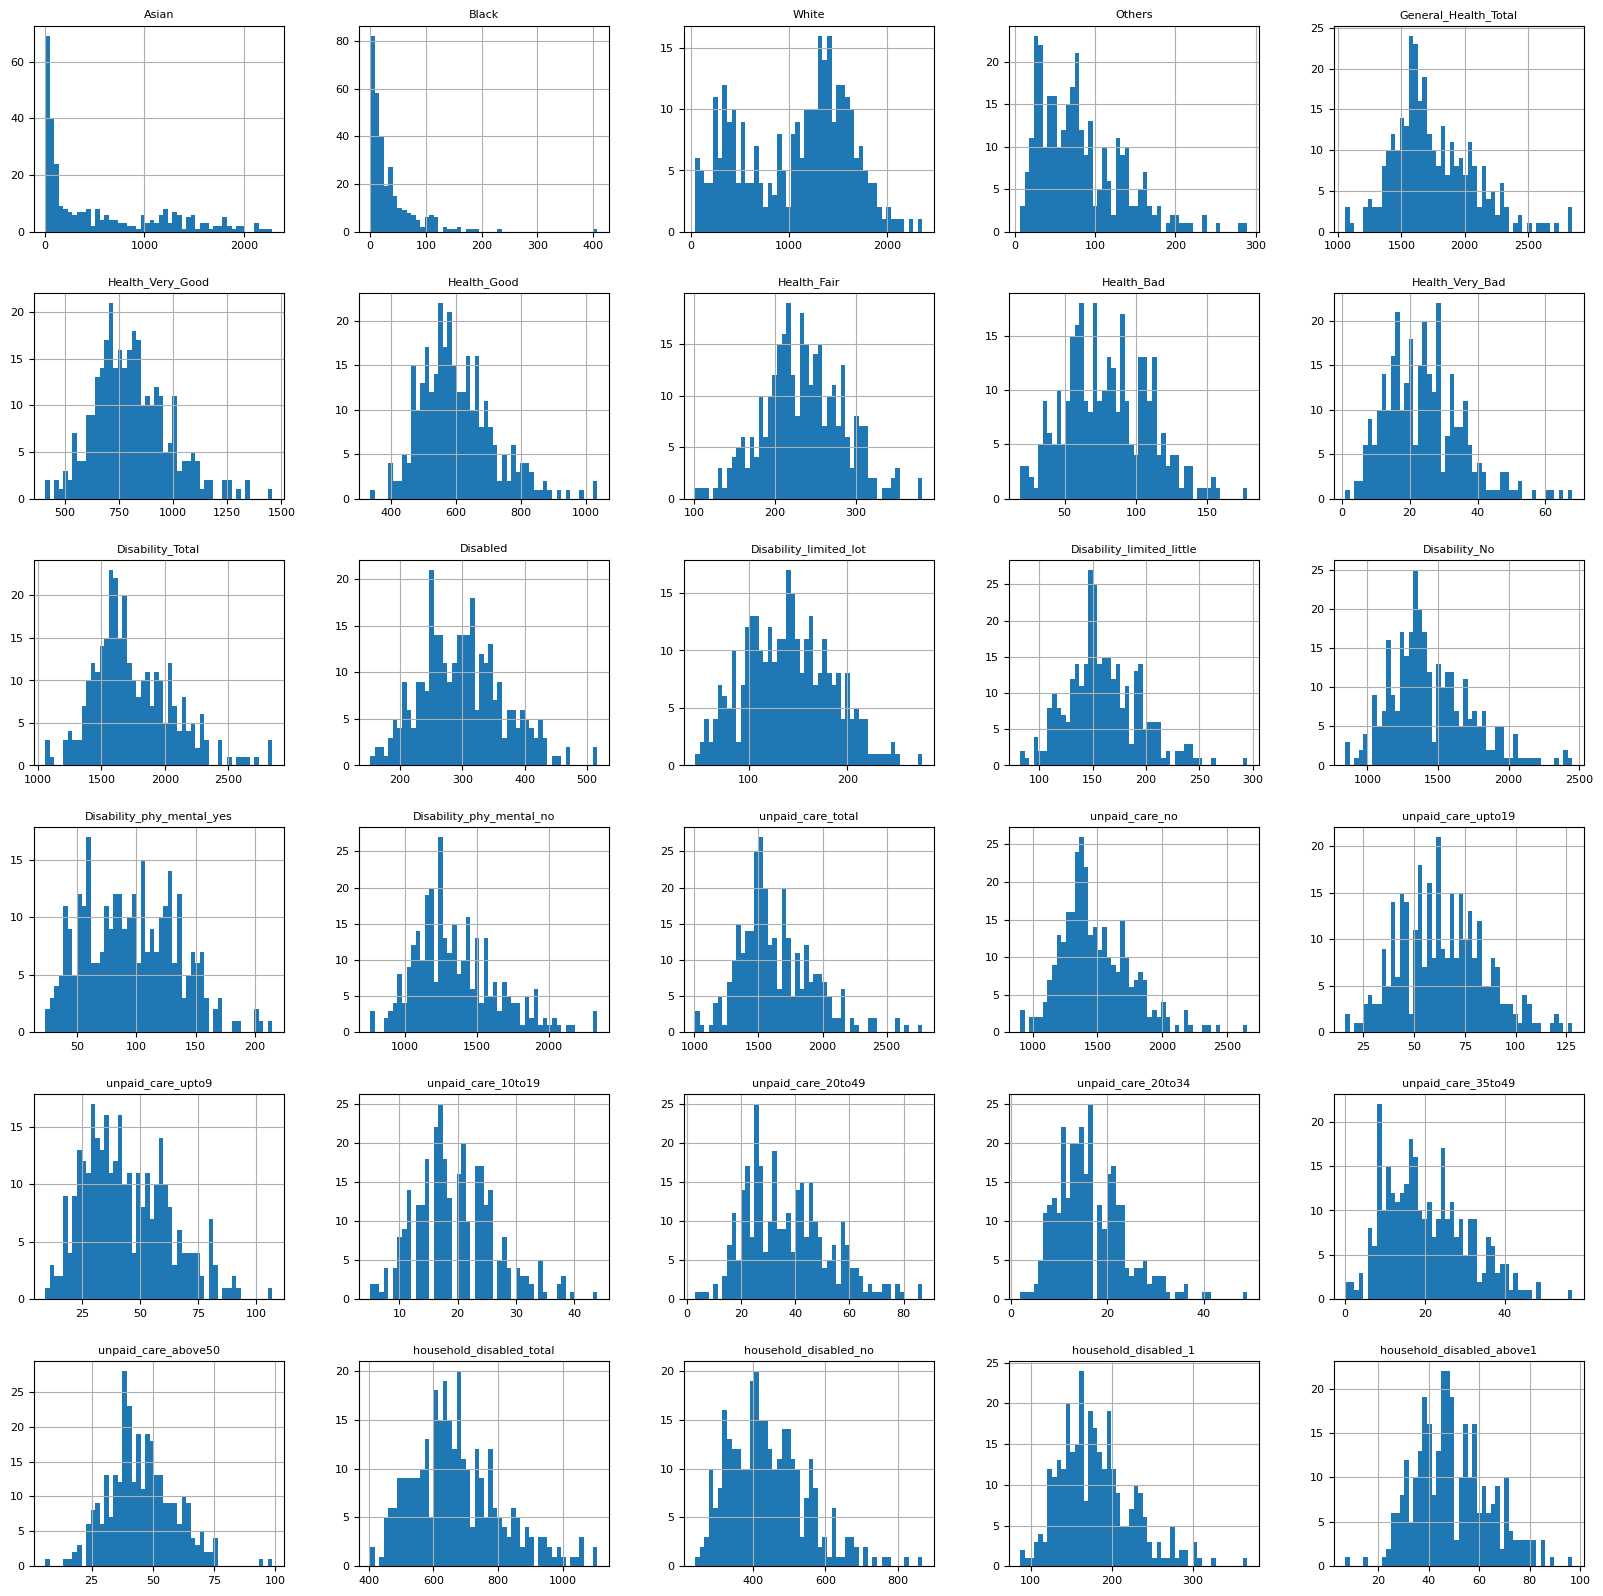

In [35]:
params = {'axes.titlesize':'8', 'xtick.labelsize':'12', 'ytick.labelsize':'12'}
plt.rcParams.update(params)
df_num.drop(columns=[]).hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8, ); # ; avoid having the matplotlib verbose informations

#### 2.2.2 Data type conversions

In [36]:
health_census.dtypes

LSOA                         object
Asian                         int64
Black                         int64
White                         int64
Others                        int64
General_Health_Total          int64
Health_Very_Good              int64
Health_Good                   int64
Health_Fair                   int64
Health_Bad                    int64
Health_Very_Bad               int64
Disability_Total              int64
Disabled                      int64
Disability_limited_lot        int64
Disability_limited_little     int64
Disability_No                 int64
Disability_phy_mental_yes     int64
Disability_phy_mental_no      int64
unpaid_care_total             int64
unpaid_care_no                int64
unpaid_care_upto19            int64
unpaid_care_upto9             int64
unpaid_care_10to19            int64
unpaid_care_20to49            int64
unpaid_care_20to34            int64
unpaid_care_35to49            int64
unpaid_care_above50           int64
household_disabled_total    

#### 2.2.3 Near Zero Variance

Variance tells us about the spread of the data.  It tells us how far the points are from the mean.

In [37]:
np.std(health_census)

Asian                        614.991346
Black                         43.910962
White                        539.425019
Others                        51.967016
General_Health_Total         316.599327
Health_Very_Good             171.138511
Health_Good                  113.189755
Health_Fair                   49.549173
Health_Bad                    29.220036
Health_Very_Bad               11.213937
Disability_Total             316.598415
Disabled                      66.278355
Disability_limited_lot        43.625236
Disability_limited_little     33.679867
Disability_No                286.706793
Disability_phy_mental_yes     38.642430
Disability_phy_mental_no     290.676994
unpaid_care_total            287.605804
unpaid_care_no               269.812600
unpaid_care_upto19            20.783020
unpaid_care_upto9             18.183600
unpaid_care_10to19             6.752809
unpaid_care_20to49            15.440311
unpaid_care_20to34             6.997472
unpaid_care_35to49            10.401527


### 2.3. Feature creation

In [38]:
data = health_census.copy()

In [39]:
# calculating total population

data ['total_population'] = data['Asian'] + data ['Black'] + data ['White'] + data ['Others']

# Calculating % of people in each ethnic group

data['Asian_pct'] = round((data['Asian'] / data['total_population']) * 100,2)
data['Black_pct'] = round((data['Black'] / data['total_population']) * 100,2)
data['White_pct'] = round((data['White'] / data['total_population']) * 100,2)
data['Others_pct'] = round((data['Others'] / data['total_population']) * 100,2)

In [40]:
# Adding general health

data['Health_Very_Good'] = data['Health_Very_Good'] + data['Health_Good']
data['Health_Very_Bad'] = data['Health_Very_Bad'] + data['Health_Bad']

In [41]:
# Apply percentage for the population data with health indicators

# Calculating total health population as[p] percentage

data['Health_Very_Good_pct'] = round((data['Health_Very_Good'] / data['General_Health_Total']) * 100,2)

data['Health_Fair_pct'] = round((data['Health_Fair'] / data['General_Health_Total']) * 100,2)

data['Health_Very_Bad_pct'] = round((data['Health_Very_Bad'] / data['General_Health_Total']) * 100,2)

In [42]:
# Adding disabilty

data['Disabled_pct'] = round((data['Disabled'] / data['Disability_Total']) * 100,2)
data['Disability_limited_lot_pct'] = round((data['Disability_limited_lot'] / data['Disability_Total']) * 100,2)
data['Disability_limited_little_pct'] = round((data['Disability_limited_little'] / data['Disability_Total']) * 100,2)
data['Disability_No_pct'] = round((data['Disability_No'] / data['Disability_Total']) * 100,2)
data['Disability_phy_mental_yes_pct'] = round((data['Disability_phy_mental_yes'] / data['Disability_Total']) * 100,2)
data['Disability_phy_mental_no_pct'] = round((data['Disability_phy_mental_no'] / data['Disability_Total']) * 100,2)

In [43]:
#unpaid care service

data['unpaid_care_up9to49'] = data['unpaid_care_upto19'] + data['unpaid_care_upto9'] + data['unpaid_care_10to19'] + data['unpaid_care_20to49'] + data['unpaid_care_35to49'] 

In [44]:
# Adding disabilty

data['unpaid_care_up9to49_pct'] = round((data['unpaid_care_up9to49'] / data['unpaid_care_total']) * 100,2)
data['unpaid_care_no_pct'] = round((data['unpaid_care_no'] / data['unpaid_care_total']) * 100,2)
data['unpaid_care_above50_pct'] = round((data['unpaid_care_above50'] / data['unpaid_care_total']) * 100,2)

In [45]:
data.head()

LSOA  Asian  Black  White  Others  General_Health_Total  \
0  E01010568     42     11   1638      31                  1719   
1  E01010569     21     17   1674      42                  1756   
2  E01010570     62      4   1409      22                  1497   
3  E01010571     52     27   1768      96                  1944   
4  E01010572     27      4   1422      29                  1483   

   Health_Very_Good  Health_Good  Health_Fair  Health_Bad  ...  Disabled_pct  \
0              1427          605          206          61  ...         17.04   
1              1355          583          257         110  ...         24.27   
2              1259          479          172          58  ...         17.42   
3              1588          703          251          84  ...         19.00   
4              1239          551          196          35  ...         15.91   

   Disability_limited_lot_pct  Disability_limited_little_pct  \
0                        6.05                          10.99   
1                       11.11                          13.16   
2                        7.08                          10.35   
3                        7.65                          11.35   
4                        4.65                          11.26   

   Disability_No_pct  Disability_phy_mental_yes_pct  \
0              82.96                           8.61   
1              75.73                           6.89   
2              82.58                           9.01   
3              81.00                           7.81   
4              84.09                           8.97   

   Disability_phy_mental_no_pct  unpaid_care_up9to49  unpaid_care_up9to49_pct  \
0                         74.35                  223                    13.74   
1                         68.83                  189                    11.37   
2                         73.56                  208                    14.50   
3                         73.19                  204                    11.27   
4                         75.12                  187                    13.19   

   unpaid_care_no_pct  unpaid_care_above50_pct  
0               90.82                     1.91  
1               89.72                     4.21  
2               90.24                     2.30  
3               91.88                     2.04  
4               91.33                     1.83  

[5 rows x 49 columns]

In [46]:
# dropping irrelevant columns only required columns

data.drop(['Asian', 'Black', 'White', 'Others', 'total_population',
           'General_Health_Total', 'Health_Very_Good', 'Health_Good',
       'Health_Fair', 'Health_Bad', 'Health_Very_Bad', 'Disability_Total',
       'Disabled', 'Disability_limited_lot', 'Disability_limited_little',
       'Disability_No', 'Disability_phy_mental_yes',
       'Disability_phy_mental_no', 'unpaid_care_total', 'unpaid_care_no',
       'unpaid_care_upto19', 'unpaid_care_upto9', 'unpaid_care_10to19',
       'unpaid_care_20to49', 'unpaid_care_20to34', 'unpaid_care_35to49',
       'unpaid_care_above50', 'household_disabled_total',
       'household_disabled_no', 'household_disabled_1',
       'household_disabled_above1','unpaid_care_up9to49',], axis=1, inplace=True)

In [47]:
data.to_csv('Dataset/Processed_Data/processed_clustering_data.csv')

## 3. EDA

In [48]:
data.describe()

Asian_pct   Black_pct   White_pct  Others_pct  Health_Very_Good_pct  \
count  312.000000  312.000000  312.000000  312.000000            312.000000   
mean    29.667853    1.905609   63.823397    4.602724             80.613269   
std     29.909094    2.151954   32.173490    2.637621              3.760570   
min      0.200000    0.000000    2.200000    0.490000             67.560000   
25%      3.510000    0.487500   29.125000    2.437500             78.517500   
50%     15.905000    1.140000   77.865000    4.185000             80.675000   
75%     59.372500    2.520000   92.470000    5.972500             82.712500   
max     94.010000   14.300000   98.740000   15.930000             92.070000   

       Health_Fair_pct  Health_Very_Bad_pct  Disabled_pct  \
count       312.000000           312.000000    312.000000   
mean         13.461346             5.926154     17.326090   
std           2.189483             1.942547      3.448461   
min           6.230000             1.700000      9.160000   
25%          12.175000             4.590000     14.800000   
50%          13.380000             5.705000     17.060000   
75%          14.770000             7.232500     19.142500   
max          20.330000            12.510000     28.970000   

       Disability_limited_lot_pct  Disability_limited_little_pct  \
count                  312.000000                     312.000000   
mean                     8.008622                       9.317788   
std                      2.179853                       2.011761   
min                      2.600000                       4.490000   
25%                      6.667500                       7.837500   
50%                      7.805000                       9.290000   
75%                      9.270000                      10.685000   
max                     14.860000                      14.110000   

       Disability_No_pct  Disability_phy_mental_yes_pct  \
count         312.000000                     312.000000   
mean           82.673910                       5.640833   
std             3.448461                       2.374730   
min            71.030000                       1.370000   
25%            80.857500                       3.550000   
50%            82.940000                       5.725000   
75%            85.200000                       7.662500   
max            90.840000                      10.760000   

       Disability_phy_mental_no_pct  unpaid_care_up9to49_pct  \
count                    312.000000               312.000000   
mean                      77.032692                11.423750   
std                        4.356441                 2.150007   
min                       66.690000                 3.090000   
25%                       73.995000                10.040000   
50%                       76.560000                11.430000   
75%                       80.192500                13.002500   
max                       86.560000                16.860000   

       unpaid_care_no_pct  unpaid_care_above50_pct  
count          312.000000               312.000000  
mean            90.986410                 2.801250  
std              1.312167                 0.776901  
min             87.990000                 0.350000  
25%             90.080000                 2.320000  
50%             91.000000                 2.730000  
75%             91.750000                 3.210000  
max             97.840000                 5.730000

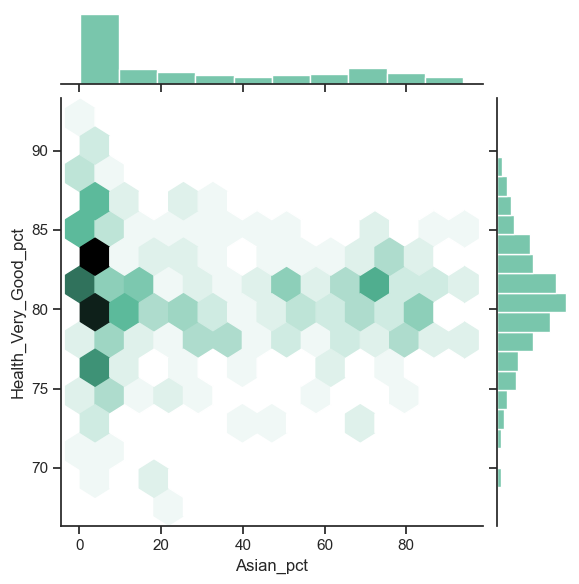

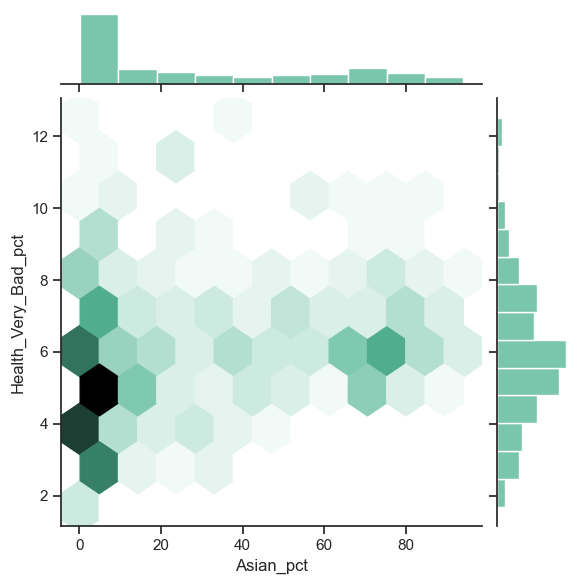

In [49]:
#Using a hexbin plot with marginal distributions to distintly assess the spread of good health compared to 
#bad health

#Plotting the hexbin plot for Good Health
sns.set(style="ticks")


x = data['Asian_pct']
y = data['Health_Very_Good_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

#Plotting the hexbin box plot for Bad health
sns.set(style="ticks")


x = data['Asian_pct']
y = data['Health_Very_Bad_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

<div class="alert alert-block alert-info">
<b>Insight:</b> The hexbin plot shows the relationship between ethnic population percentage in Bradford and the health outcomes.
The first plot shows that there is a constant relation between Asian population and the good health population. Same pattern can be seen in the bad health population percentage. 
However, it is interesting to note that Asians are concentrated in the location where there are good population residents are high. 
</div>

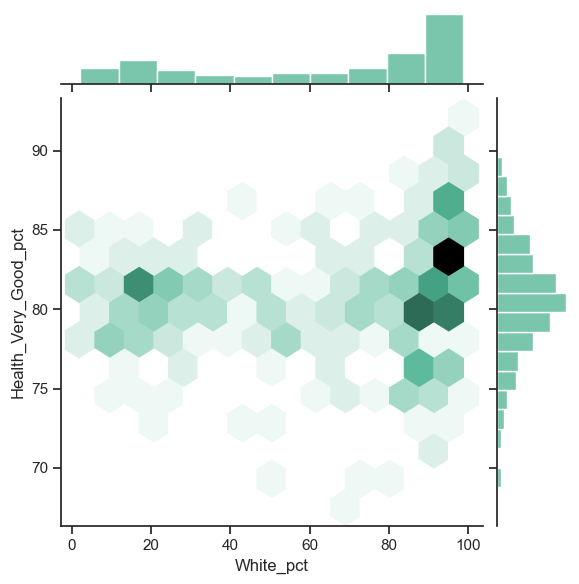

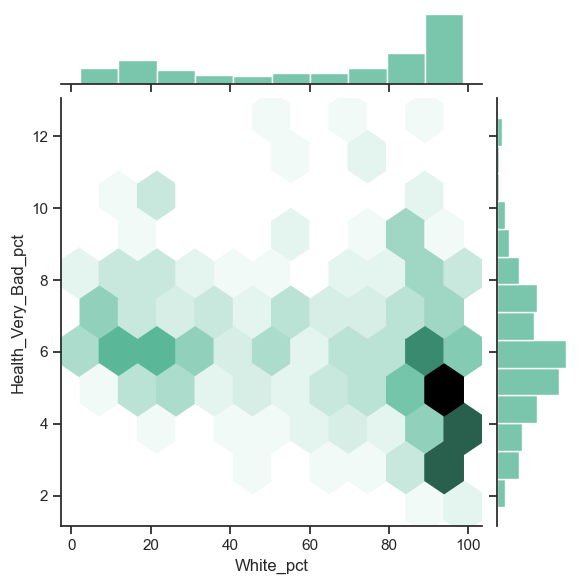

In [50]:
#Using a hexbin plot with marginal distributions to distintly assess the spread of good health compared to 
#bad health

#Plotting the hexbin plot for Good Health
sns.set(style="ticks")


x = data['White_pct']
y = data['Health_Very_Good_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

#Plotting the hexbin box plot for Bad health
sns.set(style="ticks")


x = data['White_pct']
y = data['Health_Very_Bad_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

<div class="alert alert-block alert-info">
<b>Insight:</b> White ethnic group, when there is high population density, residents have very good as well as very bad health. Therefore, segregation of white ethnic group doesn’t play any role in enhancing the society health.
</div>

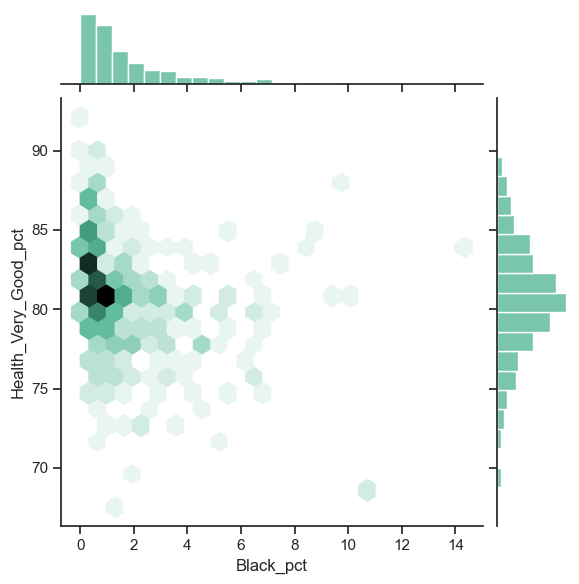

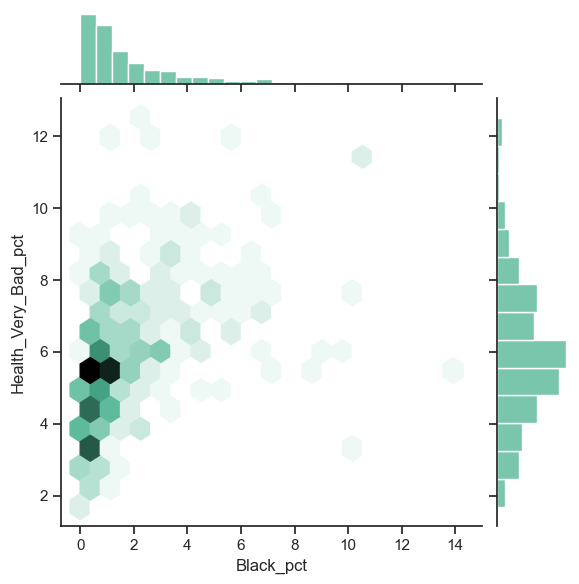

In [51]:
#Using a hexbin plot with marginal distributions to distintly assess the spread of good health compared to 
#bad health

#Plotting the hexbin plot for Good Health
sns.set(style="ticks")


x = data['Black_pct']
y = data['Health_Very_Good_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

#Plotting the hexbin box plot for Bad health
sns.set(style="ticks")


x = data['Black_pct']
y = data['Health_Very_Bad_pct']

sns.jointplot(x, y, kind="hex", color="#4CB391")

<div class="alert alert-block alert-info">
<b>Insight:</b> Blacks have less population percentage contributing to more good health and less bad health residents.
</div>

In [52]:
# Relationship Between Asian and Disabled_pct in Bradford (2021)

figure = px.scatter(data_frame = data, 
                    x="Asian_pct",
                    y="Disabled_pct", 
                    size="Disabled_pct", 
                    trendline="ols", 
                    title = "Relationship Between Asian and Disabled_pct in Bradford (2021)")
figure.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> Scatterplot shows the distribution of Asian population with percentage of residents disabled and not disabled. It can be visualized that as percentage of Asians residents increases, percentage of disabled population decreases. Region where there is low measure of Asians seems to have high disabled population. Similarly, when population of Asians increases population with no disability increases.
</div>

In [53]:
# Relationship Between Asian and Disability_No_pct in Bradford (2021)

figure = px.scatter(data_frame = data, 
                    x="Asian_pct",
                    y="Disability_No_pct", 
                    size="Disability_No_pct", 
                    trendline="ols", 
                    title = "Relationship Between Asian and Disability_No_pct in Bradford (2021)")
figure.show()

In [54]:

figure = px.scatter(data_frame = data, 
                    x="White_pct",
                    y="Disabled_pct", 
                    size="Disabled_pct", 
                    trendline="ols", 
                    title = "Relationship Between White and Disabled_pct in Bradford (2021)")
figure.show()

In [55]:
# Relationship Between White and Disability_No_pct in Bradford (2021)

figure = px.scatter(data_frame = data, 
                    x="White_pct",
                    y="Disability_No_pct", 
                    size="Disability_No_pct", 
                    trendline="ols", 
                    title = "Relationship Between White and Disability_No_pct in Bradford (2021)")
figure.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> Residents with disability and no disability both are found in the neighbourhoods where white people are less in population. 
However, residents with no disability are more when compared to residents with no disability.
</div>


In [56]:
# Relationship Between Black and Disabled_pct in Bradford (2021)

figure = px.scatter(data_frame = data, 
                    x="Black_pct",
                    y="Disabled_pct", 
                    size="Disabled_pct", 
                    trendline="ols", 
                    title = "Relationship Between Black and Disabled_pct in Bradford (2021)")
figure.show()

In [57]:
# Relationship Between Black and Disability_No_pct in Bradford (2021)

figure = px.scatter(data_frame = data, 
                    x="Black_pct",
                    y="Disability_No_pct", 
                    size="Disability_No_pct", 
                    trendline="ols", 
                    title = "Relationship Between Black and Disability_No_pct in Bradford (2021)")
figure.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> The above scatterplt displays the relationship between percentage of black populations with disabled and not disabled residents. 
It can be visualized that both variables are significant change in the attributes.
</div>


<AxesSubplot: xlabel='Asian_pct', ylabel='unpaid_care_no_pct'>

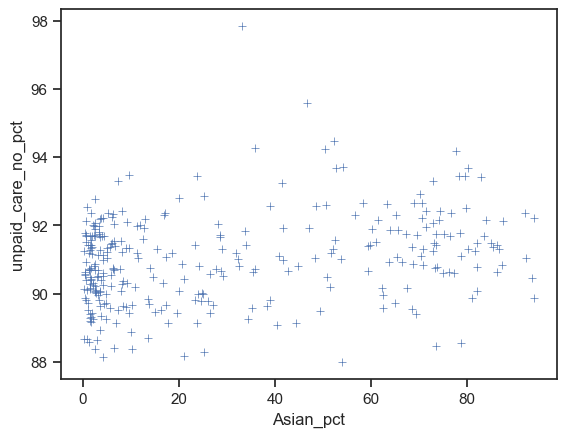

In [58]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='Asian_pct', y='unpaid_care_no_pct', data= data, marker = '+')

<AxesSubplot: xlabel='Asian_pct', ylabel='unpaid_care_above50_pct'>

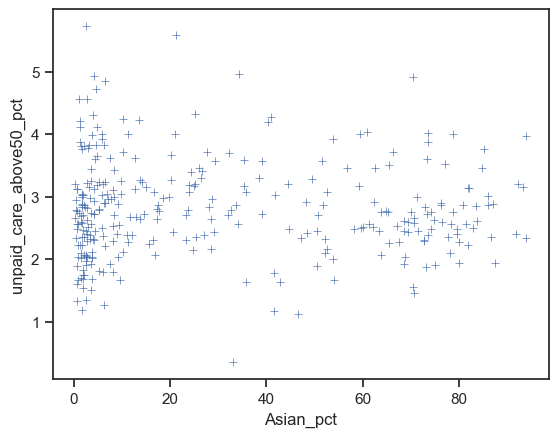

In [59]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='Asian_pct', y='unpaid_care_above50_pct', data= data, marker = '+')

<AxesSubplot: xlabel='Black_pct', ylabel='unpaid_care_no_pct'>

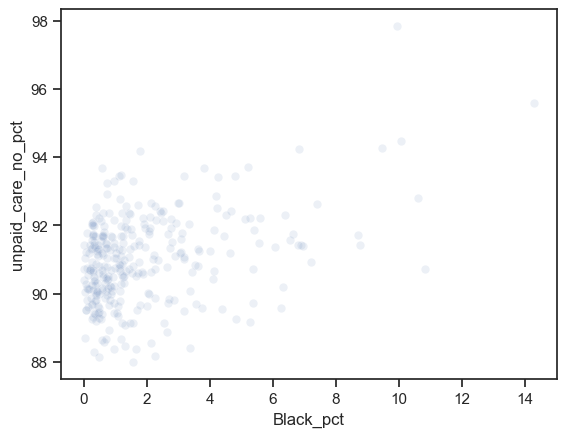

In [60]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='Black_pct', y='unpaid_care_no_pct', data= data,  alpha = 0.1)

<AxesSubplot: xlabel='Black_pct', ylabel='unpaid_care_above50_pct'>

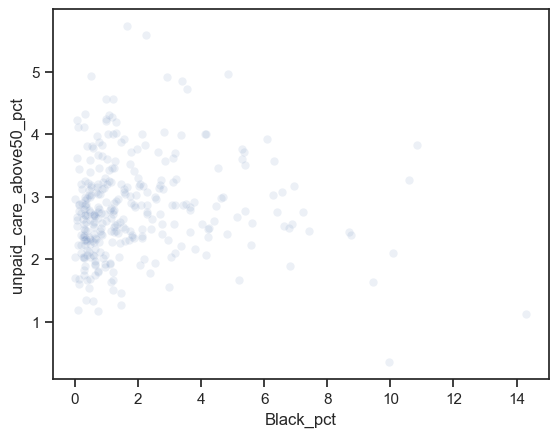

In [61]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='Black_pct', y='unpaid_care_above50_pct', data= data,  alpha = 0.1)

<AxesSubplot: xlabel='White_pct', ylabel='unpaid_care_no_pct'>

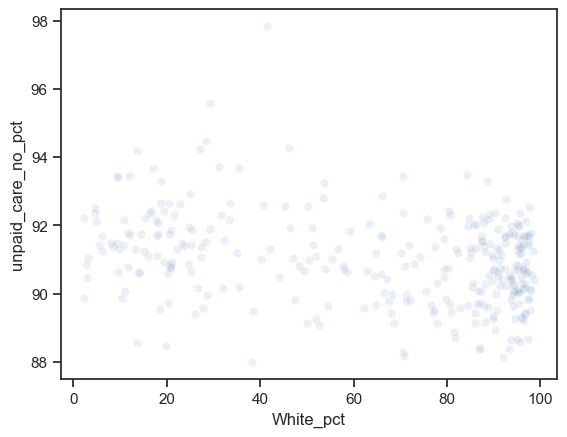

In [62]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='White_pct', y='unpaid_care_no_pct', data= data,  alpha = 0.1)

<AxesSubplot: xlabel='White_pct', ylabel='unpaid_care_above50_pct'>

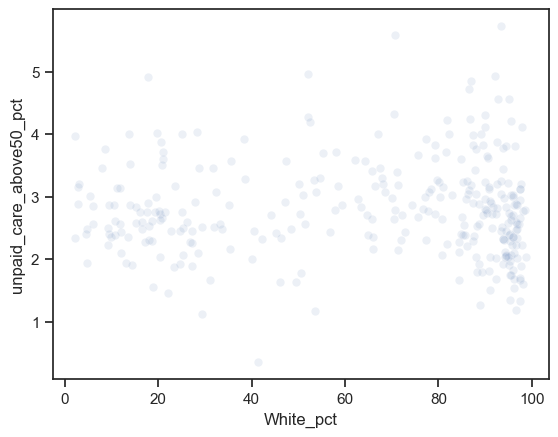

In [63]:
# Relationship Between Asian_pct and unpaid_care_no_pct in Bradford (2021)

sns.scatterplot(x='White_pct', y='unpaid_care_above50_pct', data= data,  alpha = 0.1)

In [64]:
fig = px.scatter(data, x='White_pct', y='unpaid_care_no_pct', hover_data=['unpaid_care_up9to49_pct', 'unpaid_care_above50_pct'])
fig.show()

In [65]:
fig = px.scatter(data, x='White_pct', y='unpaid_care_above50_pct', hover_data=['unpaid_care_up9to49_pct', 'unpaid_care_above50_pct'])
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> The third attribute in health outcomes is the unpaid care provision. 
An unpaid care is the help or support provided to people who have long-term physical or mental ill-health conditions and illness or problems. 
The relation between all the ethnic group and unpaid care provision in Bradford. 
Two variables were selected here to understand the pattern in the data, namely no unpaid care provision and unpaid care provision more than 50 hours. 
Overall analysis shows no unpaid care provision is provided to almost 98% of residence.
</div>